In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

In [3]:
f(3.0)

20.0

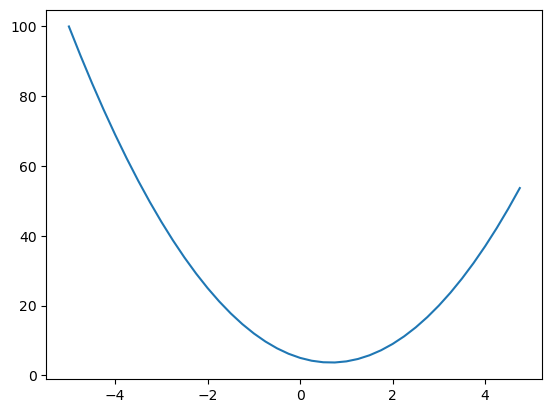

In [4]:
xs = np.arange(-5,5,0.25)
ys = f(xs)
plt.plot(xs,ys)

In [5]:
h = 0.00001
x = 3.0
(f(x+h)-f(x))/h

14.00003000000538

In [6]:
h = 0.00001
x = -1.0
(f(x+h)-f(x))/h

-9.999969999974212

In [7]:
h = 0.00000001
x = 2/3
(f(x+h)-f(x))/h #almost equal to zero

0.0

In [8]:
h = 0.0001

a = 2.0
b = -3.0
c =10.0

d1 = a*b+c
a+=h
d2 = a*b+c
print("d1 :",d1,"\nd2 :",d2)
print("Slope : ",(d2-d1)/h)


d1 : 4.0 
d2 : 3.999699999999999
Slope :  -3.000000000010772


In [9]:
h = 0.0001

a = 2.0
b = -3.0
c =10.0

d1 = a*b+c
b+=h
d2 = a*b+c
print("d1 :",d1,"\nd2 :",d2)
print("Slope : ",(d2-d1)/h)


d1 : 4.0 
d2 : 4.0002
Slope :  2.0000000000042206


In [10]:
h = 0.0001

a = 2.0
b = -3.0
c =10.0

d1 = a*b+c
c+=h
d2 = a*b+c
print("d1 :",d1,"\nd2 :",d2)
print("Slope : ",(d2-d1)/h)


d1 : 4.0 
d2 : 4.0001
Slope :  0.9999999999976694


In [11]:
class Value:
    
    def __init__(self,data,_children=(),_op=''):
        self.grad = 0.0
        self.data = data
        self._backward = lambda : None
        self._prev = set(_children)
        self._op = _op
    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        out = Value(self.data+other.data,(self,other),'+')
        def _backward():
            self.grad += 1*out.grad
            other.grad += 1*out.grad
        out._backward = _backward
        return out
    
    def __mul__(self,other):
        out = Value(self.data*other.data,(self,other),'*')
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data*out.grad
        out._backward = _backward
        return out
    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t,(self,),'tanh')
        def _backward():
            self.grad += (1 - t**2)*out.grad
        out._backward = _backward
        return out
    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()



In [12]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10)
e = a*b
d = e+c
f = Value(-2.0)
l = d+f

In [13]:
l.grad = 1.0

In [14]:
def lol():
    h=0.001
    
    a = Value(2.0)
    b = Value(-3.0)
    c = Value(10.0)
    e = a*b
    d = e+c
    f = Value(-2.0)
    l = d*f
    l1 = l.data
    
    a = Value(2.0)
    b = Value(-3.0)
    c = Value(10.0)
    e = a*b
    d = e+c
    f = Value(-2.0)
    l = d*f
    l2=l.data+h
    
    print((l2-l1)/h)

In [15]:
lol()

1.000000000000334


In [16]:
def lol():
    h=0.001
    
    a = Value(2.0)
    b = Value(-3.0)
    c = Value(10.0)
    e = a*b
    d = e+c
    f = Value(-2.0)
    l = d*f
    l1 = l.data
    
    a = Value(2.0)
    b = Value(-3.0)
    c = Value(10.0)
    e = a*b
    d = e+c
    f = Value(-2.0+h)
    l = d*f
    l2=l.data
    
    print((l2-l1)/h)

In [17]:
#L = f*d >> dL/df = d >> f = -2 >> d = 4 >> dL/df =4
lol()

3.9999999999995595


In [18]:
def lol():
    h=0.001
    
    a = Value(2.0)
    b = Value(-3.0)
    c = Value(10.0)
    e = a*b
    d = e+c
    f = Value(-2.0)
    l = d*f
    l1 = l.data
    
    a = Value(2.0)
    b = Value(-3.0)
    c = Value(10.0)
    e = a*b
    d = e+c
    d.data+=h
    f = Value(-2.0)
    l = d*f
    l2=l.data
    
    print((l2-l1)/h)

In [19]:
#L = f*d >> dL/dd = f >> f = -2 >> d = 4 >> dL/dd =-2
lol()

-2.000000000000668


In [20]:
x1 = Value(2.0)
x2 = Value(0.0)
w1 = Value(-3.0)
w2 = Value(1.0)
b = Value(6.8813735878195432)
x1w1 = x1*w1
x2w2 = x2*w2
x1w1x2w2 = x1w1+x2w2
n = x1w1x2w2 + b
o = n.tanh()

In [21]:
o.grad = 1

In [22]:
o._backward()

In [23]:
n.grad

0.4999999994343145

In [24]:
n._backward()

In [25]:
b.grad

0.4999999994343145

In [26]:
x1w1x2w2.grad

0.4999999994343145

In [27]:
b._backward()

In [28]:
x1w1x2w2._backward()

In [29]:
x1w1.grad

0.4999999994343145

In [30]:
x2w2.grad

0.4999999994343145

In [31]:
x1w1._backward()
x2w2._backward()

In [32]:
x1.grad

-1.4999999983029435

In [33]:
w1.grad

0.999999998868629

In [34]:
x2.grad

0.4999999994343145

In [35]:
w2.grad

0.0

In [36]:
x1 = Value(2.0)
x2 = Value(0.0)
w1 = Value(-3.0)
w2 = Value(1.0)
b = Value(6.8813735878195432)
x1w1 = x1*w1
x2w2 = x2*w2
x1w1x2w2 = x1w1+x2w2
n = x1w1x2w2 + b
o = n.tanh()

In [37]:
o.grad = 1.0

In [38]:
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
topo

[Value(data=1.0),
 Value(data=0.0),
 Value(data=0.0),
 Value(data=-3.0),
 Value(data=2.0),
 Value(data=-6.0),
 Value(data=-6.0),
 Value(data=6.881373587819543),
 Value(data=0.8813735878195432),
 Value(data=0.7071067815865476)]

In [39]:
for node in reversed(topo):
    node._backward()

In [40]:
print(x1.grad)

print(w1.grad)

print(x2.grad)

print(w2.grad)

-1.4999999983029435
0.999999998868629
0.4999999994343145
0.0


In [41]:
x1 = Value(2.0)
x2 = Value(0.0)
w1 = Value(-3.0)
w2 = Value(1.0)
b = Value(6.8813735878195432)
x1w1 = x1*w1
x2w2 = x2*w2
x1w1x2w2 = x1w1+x2w2
n = x1w1x2w2 + b
o = n.tanh()

In [42]:
o.backward()

In [43]:
print(x1.grad)

print(w1.grad)

print(x2.grad)

print(w2.grad)

-1.4999999983029435
0.999999998868629
0.4999999994343145
0.0


In [44]:
#accumulate the gradients to avoid overwriting of the gradients when a variable
#is used more than once
a = Value(3.0)
b = a+a
b.backward()
print(a.grad,'   ',b.grad)

2.0     1.0


In [45]:
#Now breaking down Tanh into exponential functions

In [46]:
class Value:
    
    def __init__(self,data,_children=(),_op=''):
        self.grad = 0.0
        self.data = data
        self._backward = lambda : None
        self._prev = set(_children)
        self._op = _op
    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        other = other if isinstance(other,Value) else Value(other)
        out = Value(self.data+other.data,(self,other),'+')
        def _backward():
            self.grad += 1*out.grad
            other.grad += 1*out.grad
        out._backward = _backward
        return out
    
    def __mul__(self,other):
        other = other if isinstance(other,Value) else Value(other)
        out = Value(self.data*other.data,(self,other),'*')
        
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data*out.grad
        out._backward = _backward
        return out
    
    def __pow__(self,other):
        assert isinstance(other,(int,float)),"only supports int/float"
        out = Value(self.data**other,(self,))
        
        def _backward():
            self.grad += other*(self.data**(other-1)) * out.grad
        out._backward = _backward
        return out
    
    def __rmul__(self,other):
        return self*other
    
    def __truediv__(self,other):
        return self * other**-1
    
    def __neg__(self):
        return self*-1
    
    def __sub__(self, other):
        return self + (-other)
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t,(self,),'tanh')
        def _backward():
            self.grad += (1 - t**2)*out.grad
        out._backward = _backward
        return out
    
    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self,))
        
        def _backward():
            self.grad += out.data*out.grad 
        out._backward = _backward
        return out
    
    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [47]:
a = Value(2.0)
a+=1
a

Value(data=3.0)

In [48]:
2*a

Value(data=6.0)

In [49]:
a+=-1
a.exp()

Value(data=7.38905609893065)

In [50]:
a = Value(2.0)
b = Value(4.0)
a/b

Value(data=0.5)

In [51]:
a-b

Value(data=-2.0)

In [52]:
x1 = Value(2.0)
x2 = Value(0.0)
w1 = Value(-3.0)
w2 = Value(1.0)
y = Value(6.8813735878195432)
x1w1 = x1*w1
x2w2 = x2*w2
x1w1x2w2 = x1w1+x2w2
n = x1w1x2w2 + y
e = (2*n).exp()
o = (e-1)/(e+1)
o.backward()

In [53]:
import torch

In [54]:
x1 = torch.Tensor([2.0]).double()
x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()
x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()
w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()
w2.requires_grad = True
b = torch.Tensor([6.8813735878195432]).double()
b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

0.7071066904050358


In [55]:
print(x1.grad.item())

print(w1.grad.item())

print(x2.grad.item())

print(w2.grad.item())

-1.5000003851533106
1.0000002567688737
0.5000001283844369
0.0


In [56]:
o.data

tensor([0.7071], dtype=torch.float64)

In [57]:
import random

In [101]:
class Neuron:
    def __init__(self,nin):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))
    
    def __call__(self,x):
        act = Value(0.0)
        for wi,xi in zip(self.w,x):
            act+=(wi*xi)
        act+=self.b
        out = act.tanh()
        return out
    
    def parameters(self):
        return self.w+[self.b]
    

class Layer:
    def __init__(self,nin,nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]
        
    def __call__(self,x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs)==1 else outs
    
    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]
    
class MLP:
    
    def __init__(self, nin, nouts):
        sz = [nin]+nouts
        self.layers = [Layer(sz[i],sz[i+1])for i in range(len(nouts))]
        
    def __call__(self,x):
        for layer in self.layers:
            x = layer(x)
        return x
    
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]
        



        

In [124]:
x = [2.0,3.0,-1.0]
n = MLP(3,[4,4,1])
n(x)

Value(data=-0.8107828182740048)

In [125]:
n.parameters()

[Value(data=-0.48804995534580975),
 Value(data=-0.056780572180279654),
 Value(data=0.7645023235968118),
 Value(data=0.004607876273802214),
 Value(data=0.1641941172698138),
 Value(data=-0.14091615191221307),
 Value(data=0.9231599963691826),
 Value(data=0.8144941023848447),
 Value(data=0.802448602768091),
 Value(data=-0.5369437301512077),
 Value(data=-0.8548298070319145),
 Value(data=0.4304559683166165),
 Value(data=0.8211635953788865),
 Value(data=-0.7033276747218209),
 Value(data=-0.9843358574269199),
 Value(data=0.6039579134274784),
 Value(data=0.7000277326734743),
 Value(data=-0.6396165283436179),
 Value(data=-0.21709623726512461),
 Value(data=-0.8269076418293435),
 Value(data=-0.6587995793415913),
 Value(data=0.9699318892550068),
 Value(data=-0.952918770263431),
 Value(data=0.4273883659509883),
 Value(data=0.5735300497142668),
 Value(data=0.9755801555315966),
 Value(data=0.9645517720392878),
 Value(data=0.6058155856869738),
 Value(data=0.7345432270738534),
 Value(data=-0.39093728546

In [126]:
xs = [
    [2.0,3.0,-1.0],
    [3.0,-1.0,0.5],
    [0.5,1.0,1.0],
    [1.0,1.0,-1.0]
]
ys = [1.0,-1.0,-1.0,1.0]


In [127]:
for k in range(1000):
    
    ypred = [n(x) for x in xs]
    loss = Value(0)
    for ygt,yout in zip(ys,ypred):
        loss+=(yout-ygt)**2 
    for p in n.parameters():
        p.grad=0
    loss.backward()
    
    for p in n.parameters():
        p.data += -0.01 *p.grad
        
    print(k, loss.data)

0 7.277972446388735
1 4.984609373733125
2 4.030049808002784
3 4.777194220118353
4 3.989857564905493
5 3.306178355089598
6 1.9988777558026158
7 2.540052057272908
8 1.3090382074719469
9 3.2977764540713475
10 2.1409267233255322
11 1.6278421796278688
12 1.3199087970532966
13 1.1483489679976686
14 0.9342858645555222
15 0.8728409310833051
16 0.6362706613747248
17 0.615066961162386
18 0.5546353992510836
19 0.5054551301314278
20 0.4504727365763444
21 0.4052100573291926
22 0.420956056558635
23 0.3553563532133188
24 0.33597969561338176
25 0.3076210256489913
26 0.3056371791000999
27 0.27679427279773205
28 0.2626750539687137
29 0.2554072270925585
30 0.24200235901083905
31 0.23475525487750568
32 0.2266832937759217
33 0.21573547724390438
34 0.19740384485107407
35 0.1899082174606248
36 0.1822051490391615
37 0.17873155299323001
38 0.17427123508807552
39 0.1691256531944366
40 0.15754948721147416
41 0.15206445327272425
42 0.1469955099422316
43 0.14221449500374989
44 0.13749821441987564
45 0.133432166922

377 0.010224993549455575
378 0.010195654887725806
379 0.01016562204291556
380 0.010134897135198509
381 0.010105905094333817
382 0.010075820286816556
383 0.01004635782069126
384 0.010015499240885427
385 0.00998644933269337
386 0.009958112816415352
387 0.009930332187110681
388 0.00990112448503006
389 0.00987268596652985
390 0.009844229190676181
391 0.009816596220993203
392 0.009789309691116478
393 0.009761463861373831
394 0.009733238639172139
395 0.009706652115898393
396 0.009680000440521933
397 0.00965282662319835
398 0.009626216626240622
399 0.009599216491055407
400 0.009572428192960942
401 0.009545827349003229
402 0.009519613141938811
403 0.009494552704665468
404 0.009468273961335733
405 0.009441937218866223
406 0.00941685708573435
407 0.009391452571478075
408 0.00936631565849809
409 0.009341933612594385
410 0.009317267562286194
411 0.009292023896873756
412 0.009267372482681984
413 0.009242522125972787
414 0.00921804381534923
415 0.00919319115050535
416 0.009168650086332384
417 0.0091

710 0.005104322867504227
711 0.0050964880475572304
712 0.005088996462038345
713 0.005081334316809307
714 0.005073710384460744
715 0.005065672359453009
716 0.00505766194809726
717 0.005050102392248626
718 0.005042624318592246
719 0.005035097839733863
720 0.005027203117431827
721 0.005019856931663004
722 0.005012201770856623
723 0.00500464471311087
724 0.004996934184564456
725 0.004989519597532071
726 0.004981930456619999
727 0.004974015395063377
728 0.004966815444633024
729 0.004959027046467028
730 0.004951972293321144
731 0.004944910682109473
732 0.004937857928987538
733 0.004930339123748545
734 0.0049231474866943395
735 0.004916090050757623
736 0.004908918748990961
737 0.0049017029405776695
738 0.004894568777281904
739 0.0048869931439047744
740 0.004879927742824387
741 0.004872694293187078
742 0.004865758202319214
743 0.004858562282823747
744 0.004851505478660884
745 0.004844600059750268
746 0.004837622288674861
747 0.004830635905549097
748 0.0048236448712919485
749 0.0048166634816665

In [128]:
ypred

[Value(data=0.972203814413373),
 Value(data=-0.9699796959390938),
 Value(data=-0.9699920781698227),
 Value(data=0.9690375477867235)]

In [129]:
ys

[1.0, -1.0, -1.0, 1.0]